In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

In [36]:
#list of all disorders from the ldsc analysis
disorders = ['ADHD','ANOREXIA', 'ANXIETY','ARTHRITIS','ASD','AUD','BILIARYCHIRROSIS','BPD','CHRONICPAIN','CUD','ENDOMETRIOSIS','EPILEPSY','FATIGUE','FIBROMYALGIA','GDM','GOUT','HOARDING','IBD','IBS','LUPUS','MDD','MIGRAINE','MS','MYASTHENIA','OCD','OD','PANIC','PARKINSONS','PCOS','PREECLAMPSIA','PRETERMBIRTH','PTSD','SJOGRENS','SZC','THYROID','TS']

In [48]:
len(disorders)

36

In [38]:
#make list of files to read in
ex_table_files = glob.glob('*_extracted_table.txt')
# Sort the list of files based on the numeric part in the filenames
ex_table_files = sorted(ex_table_files, key=lambda x: int(x.split('_')[0]), reverse=True)

In [44]:
len(ex_table_files)

35

In [40]:

df_list = []

#read in files to dataframes 
for file in ex_table_files:
    df = pd.read_csv(file, delim_whitespace=True
                     , skiprows=1) 
    #select relevant columns
    df = df[['p1','p2','rg','se','z','p']]
    #remove last two rows
    df = df.iloc[:-2]
    df_list.append(df)

In [47]:
df_list[34]

,p1,p2,rg,se,z,p
0,munged/THYROID.sumstats.gz,munged/TS.sumstats.gz,0.0547,0.0597,0.9154,0.36


In [62]:
def make_correlation_matrix2(column, df_list):
    n = len(df_list) +1
    array = np.zeros((n, n))

    for i, df in enumerate(df_list):
        val = df[column].values

        if len(val) > 0:  # Check if 'rg' column is not empty
            # Extract values of 'rg' column to a list
            rg_values = list(val)

            # Fill the matrix starting from below the diagonal
            for j in range(i + 1, n):
                array[j, i] = rg_values.pop(0)

    # Fill the diagonal 
    if column == 'rg':            
        np.fill_diagonal(array, 1)
    else:
        np.fill_diagonal(array, 0.00005)

    # Convert the filled cells to numeric
    array = array.astype(float)
    

    # Create a DataFrame with disorders as column and index names
    return pd.DataFrame(array, index=disorders, columns=disorders), array


In [63]:
#corr_pval_df = make_correlation_matrix('p', df_list)
gen_corr_df, corr_matrix = make_correlation_matrix2('rg', df_list)

In [84]:
gen_corr_df.describe()

,ADHD,ANOREXIA,ANXIETY,ARTHRITIS,ASD,AUD,BILIARYCHIRROSIS,BPD,CHRONICPAIN,CUD,...,PANIC,PARKINSONS,PCOS,PREECLAMPSIA,PRETERMBIRTH,PTSD,SJOGRENS,SZC,THYROID,TS
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.272662,0.006105,0.118243,-0.004084,0.213165,0.083150,0.013484,0.053187,0.170666,0.123584,...,0.002188,0.075250,-0.101611,0.003280,0.100517,0.041356,0.043925,0.031817,0.029297,0.027778
std,0.398906,0.368543,0.525833,0.571985,0.751317,0.222699,0.272453,0.291093,0.283057,0.367634,...,0.354406,0.219917,0.844712,0.209908,0.335195,0.180664,0.182020,0.167387,0.166656,0.166667
min,-0.141500,-0.563500,-2.545000,-3.038000,-0.333800,-0.116800,-1.125000,-0.752000,-0.114500,-0.488300,...,-1.789000,0.000000,-4.055000,-0.702200,-0.204300,-0.170200,-0.081600,0.000000,0.000000,0.000000
25%,0.047110,-0.127550,0.000000,-0.036138,0.000000,-0.009231,-0.002272,-0.015938,0.000000,-0.001060,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.141250,-0.023990,0.127900,0.002409,0.067060,0.000000,0.003423,0.000000,0.088855,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.350700,0.033040,0.319800,0.101510,0.187850,0.106750,0.100192,0.112750,0.226125,0.069685,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.910000,1.668000,1.000000,1.000000,4.393000,1.000000,1.000000,1.000000,1.171000,1.615000,...,1.000000,1.000000,2.267000,1.000000,1.536000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
gen_corr_df.fillna(0, inplace=True)

In [67]:
full_matrix = np.tril(corr_matrix) + np.tril(corr_matrix, -1).T
full_df = pd.DataFrame(full_matrix, index=disorders, columns=disorders)

In [8]:
""" full_df.to_csv('genetic_correlation.csv', header=True, index=True)
gen_corr_df.to_csv('genetic_correlation_all.csv', header= True, index=True) """

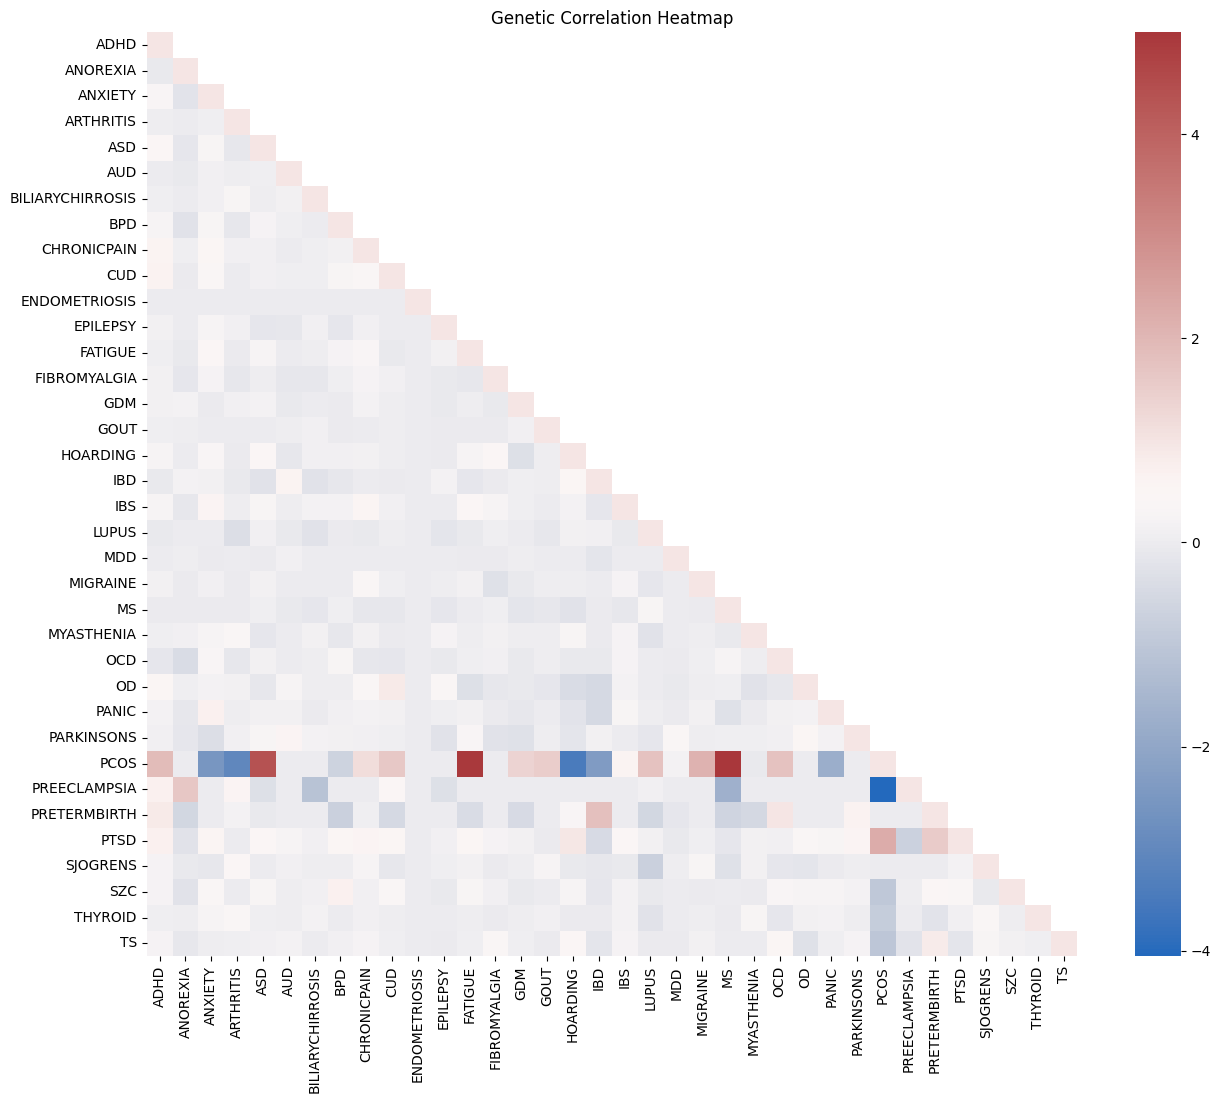

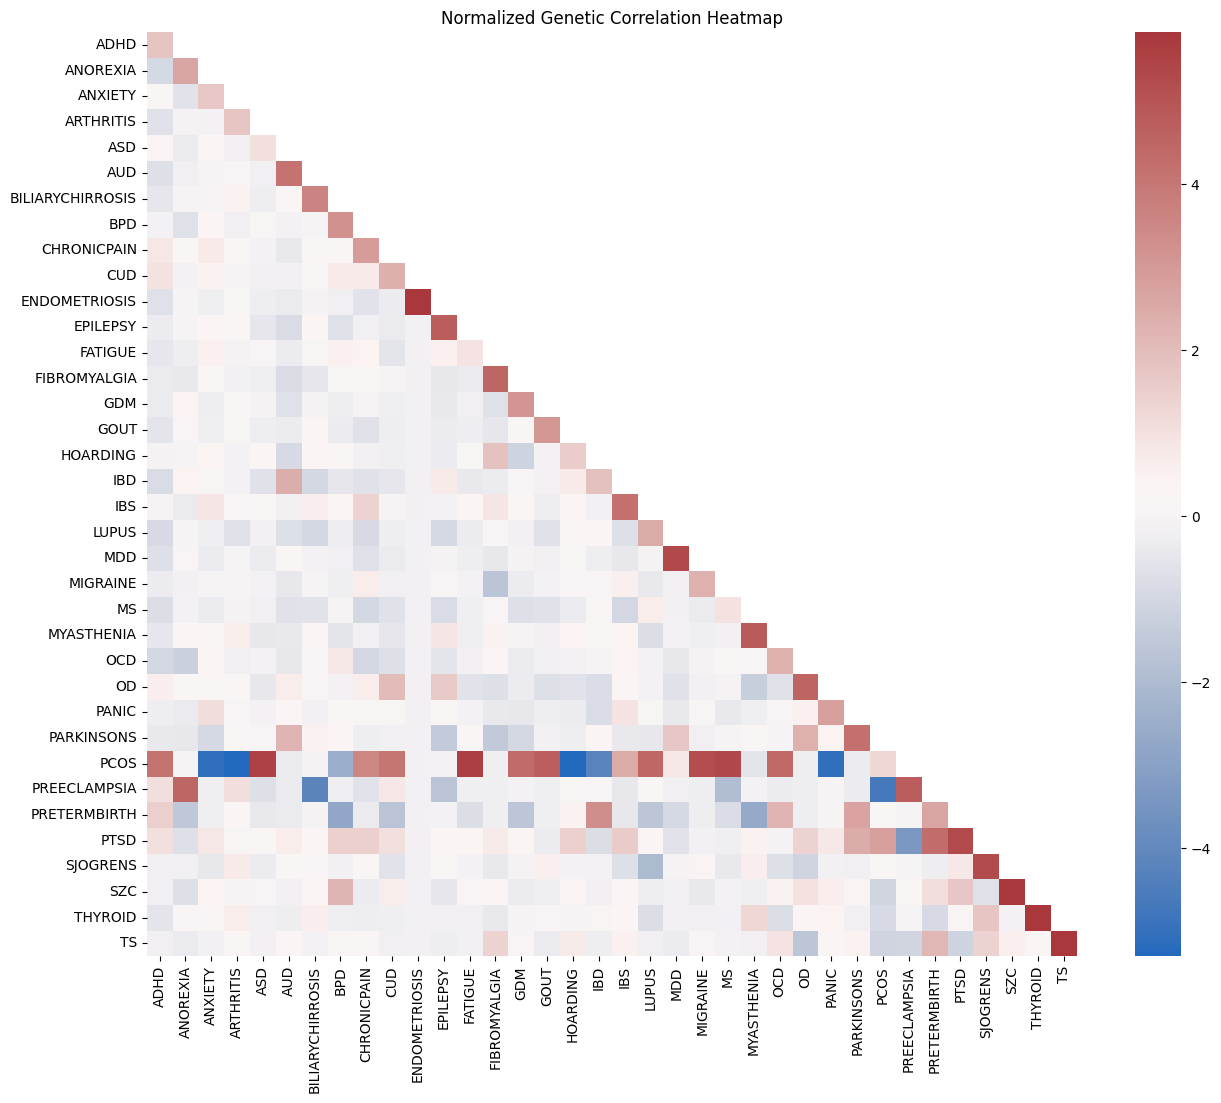

In [96]:
# Create a mask for the upper triangular part over the diagonal
mask = np.triu(np.ones_like(gen_corr_df), k=1)

# Plot the heatmap
plt.figure(figsize=(15,12))
heatmap= sns.heatmap(gen_corr_df, cmap='vlag',mask=mask)

plt.title('Genetic Correlation Heatmap')
plt.show()

plt.figure(figsize=(15,12))
df_norm_col=(gen_corr_df-gen_corr_df.mean())/gen_corr_df.std()
heatmap= sns.heatmap(df_norm_col, cmap='vlag',mask=mask)

plt.title('Normalized Genetic Correlation Heatmap')
plt.show()

<Figure size 2000x1500 with 0 Axes>

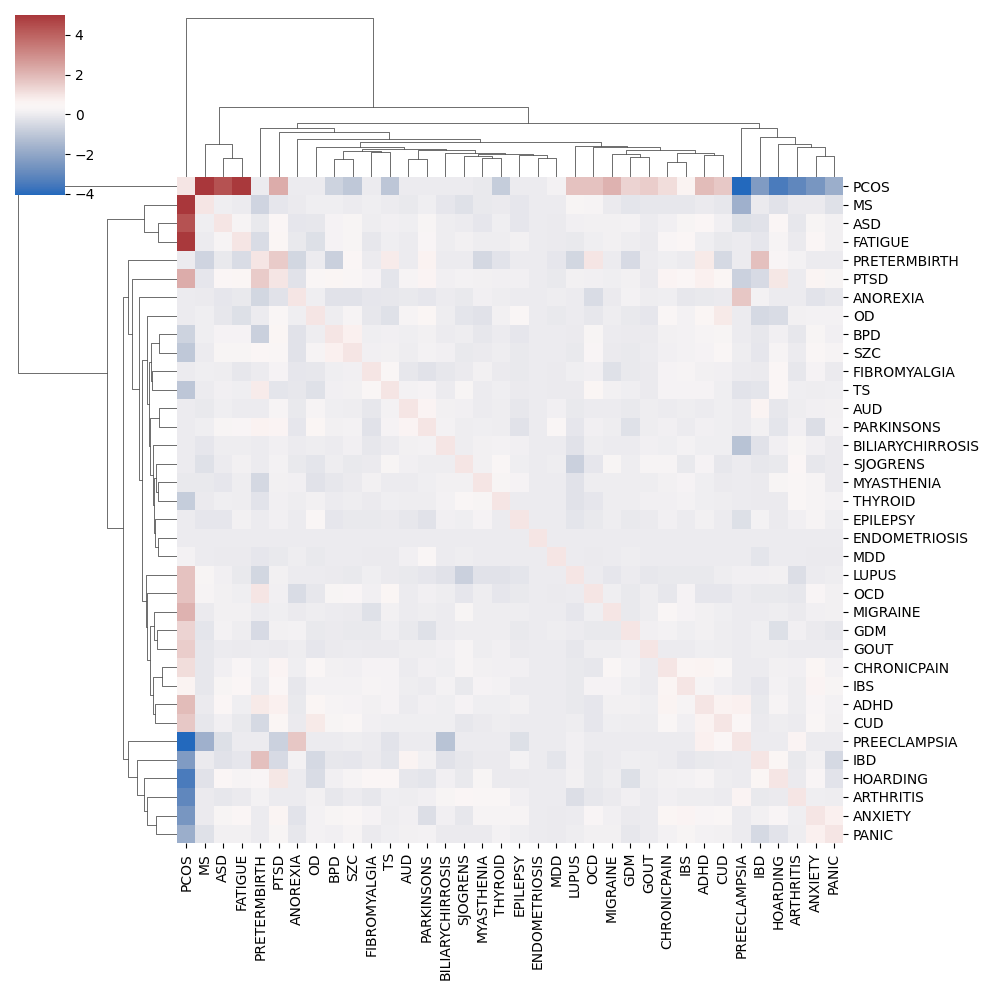

In [99]:
#plot clustermap
plt.figure(figsize=(20,15))
sns.clustermap(full_df,cmap='vlag')
plt.show()